In [24]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev
from pyprocessmacro import Process

In [25]:
wtpdata= pd.read_csv(r'WTP_master_BALANCED_UPDATED.csv')
print(wtpdata)

                       dem_ID  balanced  dem_AGE  dem_SEX  dem_GENDER  \
0    56259489ed6e5a0005c80fde         1       35        2           1   
1    58060d08b869700001d70b8c         1       33        1           1   
2    5914b7b50a4b9d0001add64f         1       33        1           1   
3    5a78e410ae9a0b0001a97274         1       30        2           2   
4    5adbc051f6b58c0001fa3bbe         1       25        1           1   
5    5af529ca222e4d0001878444         1       26        1           1   
6    5b48f2d0ff7497000125165e         1       31        1           1   
7    5bb0c112a1c73d0001b9ce9e         1       27        2           2   
8    5beaed3f0af61d0001968d9a         1       24        2           2   
9    5bfadc1846911f0001d7d1eb         1       23        1           1   
10   5c1a8a5e2a85450001a878cd         1       30        1           1   
11   5c3cd553c21f060001c3e571         1       33        2           2   
12   5c4e7b34620ba700010c5dc6         1       23   

In [55]:
wtp_long= pd.read_csv(r'WTP_data_LONG.csv')
print(wtp_long)

                       dem_ID  dem_AGE  dem_SEX  dem_GENDER  dem_ETHNICITY  \
0    56259489ed6e5a0005c80fde       35        2           1              2   
1    58060d08b869700001d70b8c       33        1           1              2   
2    5914b7b50a4b9d0001add64f       33        1           1              2   
3    5a78e410ae9a0b0001a97274       30        2           2              2   
4    5adbc051f6b58c0001fa3bbe       25        1           1              2   
5    5af529ca222e4d0001878444       26        1           1              1   
6    5b48f2d0ff7497000125165e       31        1           1              2   
7    5bb0c112a1c73d0001b9ce9e       27        2           2              2   
8    5beaed3f0af61d0001968d9a       24        2           2              2   
9    5bfadc1846911f0001d7d1eb       23        1           1              1   
10   5c1a8a5e2a85450001a878cd       30        1           1              1   
11   5c3cd553c21f060001c3e571       33        2           2     

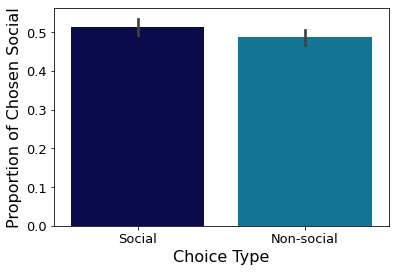

In [60]:
wtp_plot = sns.barplot(x="S_NS", y="prop", data=wtp_long, palette="ocean")
wtp_plot.set_xlabel('Choice Type',fontsize=16)
wtp_plot.set_ylabel('Proportion of Chosen Social',fontsize=16)
wtp_plot.tick_params(labelsize=13)
#wtp_plot.figure.savefig('new_choicetype_sumspent.svg')

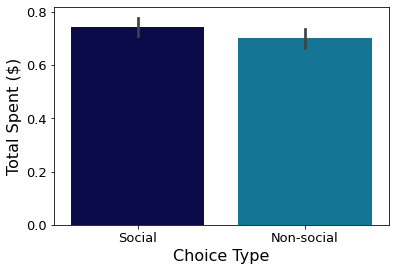

In [61]:
wtp_plot = sns.barplot(x="S_NS", y="sum_spent", data=wtp_long, palette="ocean")
wtp_plot.set_xlabel('Choice Type',fontsize=16)
wtp_plot.set_ylabel('Total Spent ($)',fontsize=16)
wtp_plot.tick_params(labelsize=13)
#wtp_plot.figure.savefig('new_choicetype_sumspent.svg')

In [26]:
socialtotal= wtpdata.total_spent_social
#calculate group mean for tot spent on social experiences
social_M = mean(socialtotal)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialtotal)))

group mean: 0.744911504425
standard error of the mean: 0.017095629134


In [27]:
nonsocialtotal = wtpdata.total_spent_nonsocial
#calculate group mean for tot spent on non-social experiences


nonsocial_M = mean(nonsocialtotal)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialtotal)))

group mean: 0.700929203540
standard error of the mean: 0.016764259911


In [28]:
#sample size
n = len(wtpdata)
print(n)

226


In [29]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialtotal[i]-nonsocialtotal[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialtotal[i]-nonsocialtotal[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

49.68320000000002 9.939999999999998
0.46783670431847413


In [30]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.031120034657968292


In [31]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

1.413311436454137


In [32]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

225


In [33]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('t test: Accept null hypothesis that the means are equal.')
else:
	print('t test: Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('p value: Accept null hypothesis that the means are equal.')
else:
	print('p value: Reject the null hypothesis that the means are equal.')

t=1.413, df=225, cv=1.652, p=0.159
t test: Accept null hypothesis that the means are equal.
p value: Accept null hypothesis that the means are equal.


In [35]:
socialprop= wtpdata.prop_social
#calculate group mean for tot spent on social experiences
socialprop_M = mean(socialprop)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialprop)))

group mean: 0.744911504425
standard error of the mean: 0.010413390716


In [36]:
nonsocialprop= wtpdata.prop_nonsocial
#calculate group mean for tot spent on social experiences
nonsocialprop_M = mean(nonsocialprop)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(nonsocialprop)))

group mean: 0.744911504425
standard error of the mean: 0.010413390716


In [37]:
#Calculate STD
# sum squared difference between observations
d3 = sum([(socialprop[i]-nonsocialprop[i])**2 for i in range(n)])
# sum difference between observations
d4 = sum([socialprop[i]-nonsocialprop[i] for i in range(n)])
print(d3,d4)

# standard deviation of the difference between means
standev = np.sqrt((d3 - (d4**2 / n)) / (n - 1))
print(standev)

#calculate standard error of the difference between the means
sed2 = standev / np.sqrt(n)
print(sed)

# calculate the t statistic
t_stat = (socialprop_M - nonsocialprop_M) / sed
print(t_stat)

# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

22.21621699006986 6.009260948
0.31309517788562896
0.031120034657968292
0.8544222557792402
225
t=0.854, df=225, cv=1.652, p=0.394
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


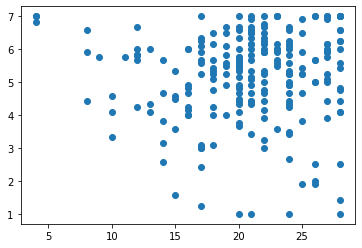

[[26.04273353  0.21622747]
 [ 0.21622747  1.86594231]]
Pearsons correlation: 0.031
p value: 0.6428
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'MSPSS')

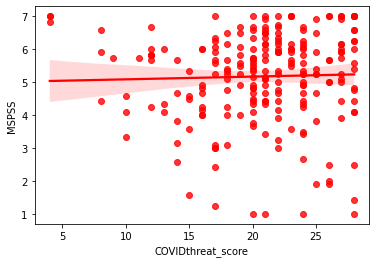

In [39]:
# COVID threat vs MSPSS

x = wtpdata['COVIDthreat_score']
y = wtpdata['MSPSS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDthreat_score", y="MSPSS", data=wtpdata,color="red");
sum_mspss.set_ylabel('MSPSS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

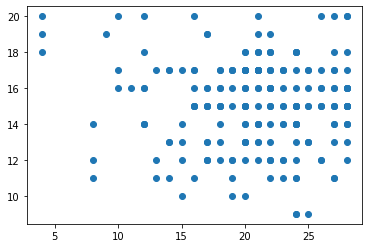

[[26.04273353 -0.66412979]
 [-0.66412979  5.73233038]]
Pearsons correlation: -0.054
p value: 0.4161
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'BRCS')

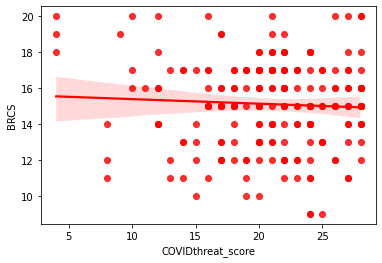

In [40]:
# COVID threat vs BRCS

x = wtpdata['COVIDthreat_score']
y = wtpdata['BRCS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDthreat_score", y="BRCS", data=wtpdata,color="red");
sum_mspss.set_ylabel('BRCS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

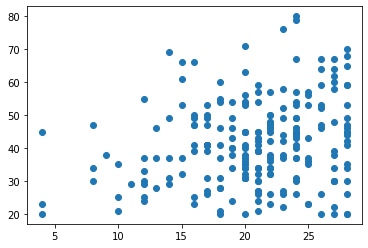

[[ 26.04273353  13.90684366]
 [ 13.90684366 164.88151426]]
Pearsons correlation: 0.212
p value: 0.0013
Reject the null hypothesis that the means are equal.


Text(0, 0.5, 'STAI')

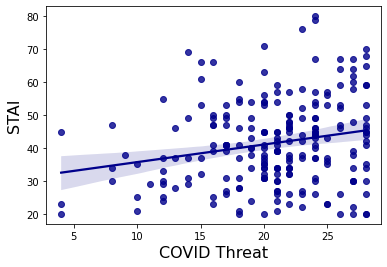

In [75]:
# COVID threat vs STAI

x = wtpdata['COVIDthreat_score']
y = wtpdata['STAI']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDthreat_score", y="STAI", data=wtpdata,color="darkblue");
sum_mspss.set_xlabel('COVID Threat',fontsize=16)
sum_mspss.set_ylabel('STAI',fontsize=16)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

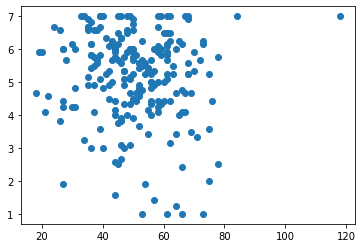

[[187.34208456  -1.87223533]
 [ -1.87223533   1.86594231]]
Pearsons correlation: -0.100
p value: 0.1334
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'MSPSS')

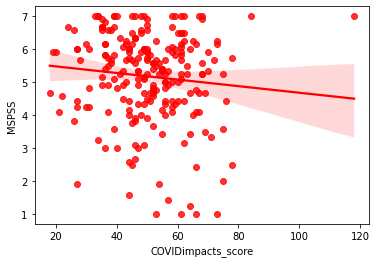

In [42]:
# COVID threat vs MSPSS

x = wtpdata['COVIDimpacts_score']
y = wtpdata['MSPSS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDimpacts_score", y="MSPSS", data=wtpdata,color="red");
sum_mspss.set_ylabel('MSPSS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

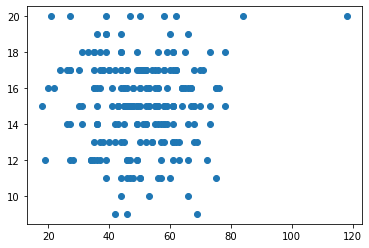

[[187.34208456   1.11699115]
 [  1.11699115   5.73233038]]
Pearsons correlation: 0.034
p value: 0.6102
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'BRCS')

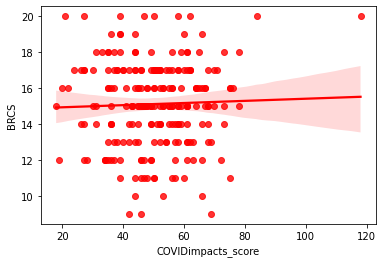

In [43]:
# COVID Impact vs BCRS

x = wtpdata['COVIDimpacts_score']
y = wtpdata['BRCS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDimpacts_score", y="BRCS", data=wtpdata,color="red");
sum_mspss.set_ylabel('BRCS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

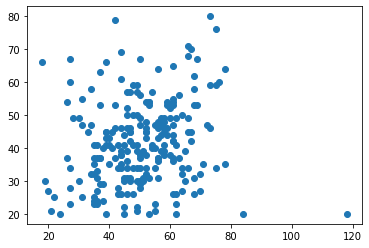

[[187.34208456  30.15400197]
 [ 30.15400197 164.88151426]]
Pearsons correlation: 0.172
p value: 0.0098
Reject the null hypothesis that the means are equal.


Text(0, 0.5, 'STAI')

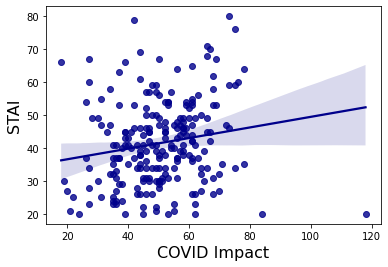

In [72]:
# COVID impact vs STAI

x = wtpdata['COVIDimpacts_score']
y = wtpdata['STAI']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDimpacts_score", y="STAI", data=wtpdata,color="darkblue");
sum_mspss.set_xlabel('COVID Impact',fontsize=16)
sum_mspss.set_ylabel('STAI',fontsize=16)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

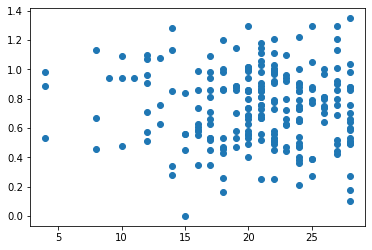

[[26.04273353 -0.04915497]
 [-0.04915497  0.06605088]]
Pearsons correlation: -0.037
p value: 0.5751
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'total_spent_social')

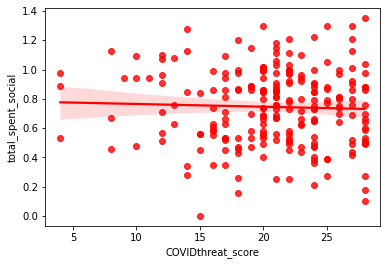

In [45]:
# COVID threat vs total_spent_social

x = wtpdata['COVIDthreat_score']
y = wtpdata['total_spent_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDthreat_score", y="total_spent_social", data=wtpdata,color="red");
sum_mspss.set_ylabel('total_spent_social',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

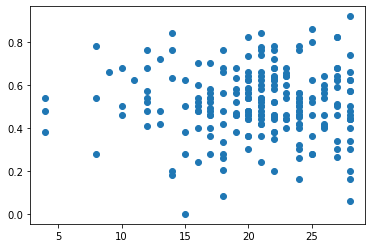

[[ 2.60427335e+01 -4.23783981e-03]
 [-4.23783981e-03  2.45071476e-02]]
Pearsons correlation: -0.005
p value: 0.9368
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'prop_social')

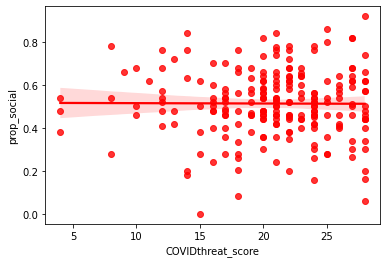

In [46]:
# COVID threat vs prop_social

x = wtpdata['COVIDthreat_score']
y = wtpdata['prop_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDthreat_score", y="prop_social", data=wtpdata,color="red");
sum_mspss.set_ylabel('prop_social',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

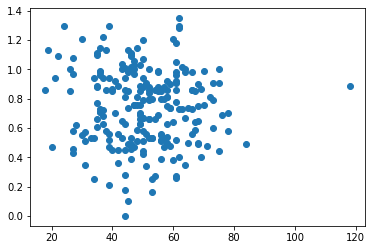

[[ 1.87342085e+02 -1.81545919e-01]
 [-1.81545919e-01  6.60508810e-02]]
Pearsons correlation: -0.052
p value: 0.4401
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'total_spent_social')

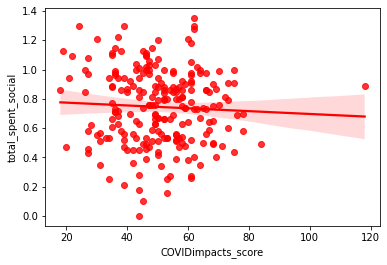

In [47]:
# COVID impact vs total_spent_social

x = wtpdata['COVIDimpacts_score']
y = wtpdata['total_spent_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDimpacts_score", y="total_spent_social", data=wtpdata,color="red");
sum_mspss.set_ylabel('total_spent_social',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

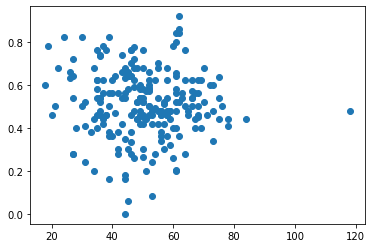

[[ 1.87342085e+02 -1.22682306e-01]
 [-1.22682306e-01  2.45071476e-02]]
Pearsons correlation: -0.057
p value: 0.3916
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'prop_social')

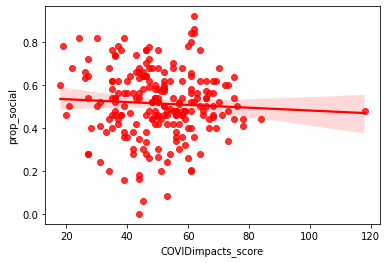

In [48]:
# COVID impact vs prop_social

x = wtpdata['COVIDimpacts_score']
y = wtpdata['prop_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDimpacts_score", y="prop_social", data=wtpdata,color="red");
sum_mspss.set_ylabel('prop_social',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

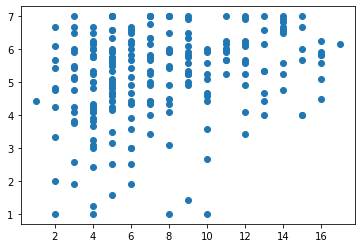

[[14.89093412  1.34764012]
 [ 1.34764012  1.86594231]]
Pearsons correlation: 0.256
p value: 0.0001
Reject the null hypothesis that the means are equal.


Text(0, 0.5, 'MSPSS')

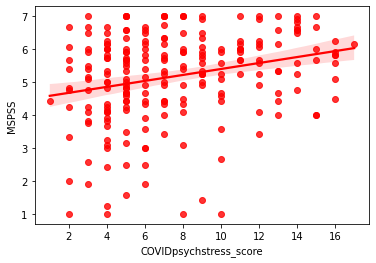

In [49]:
# COVID stress vs MSPSS

x = wtpdata['COVIDpsychstress_score']
y = wtpdata['MSPSS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDpsychstress_score", y="MSPSS", data=wtpdata,color="red");
sum_mspss.set_ylabel('MSPSS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

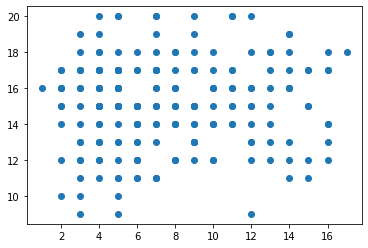

[[14.89093412  0.47174041]
 [ 0.47174041  5.73233038]]
Pearsons correlation: 0.051
p value: 0.4450
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'BRCS')

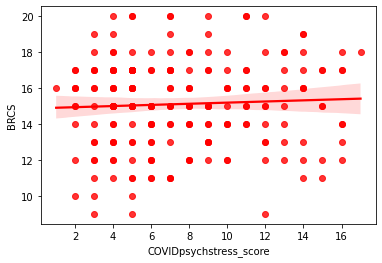

In [50]:
# COVID stress vs BRCS

x = wtpdata['COVIDpsychstress_score']
y = wtpdata['BRCS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDpsychstress_score", y="BRCS", data=wtpdata,color="red");
sum_mspss.set_ylabel('BRCS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

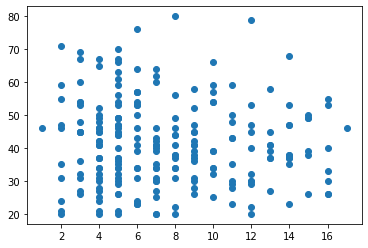

[[ 14.89093412  -3.04409046]
 [ -3.04409046 164.88151426]]
Pearsons correlation: -0.061
p value: 0.3579
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'MSPSS')

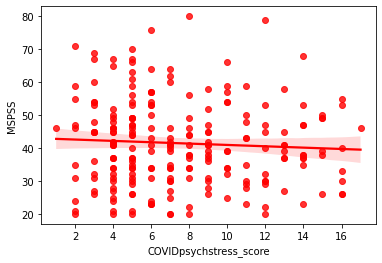

In [51]:
# COVID stress vs STAI

x = wtpdata['COVIDpsychstress_score']
y = wtpdata['STAI']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDpsychstress_score", y="STAI", data=wtpdata,color="red");
sum_mspss.set_ylabel('MSPSS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

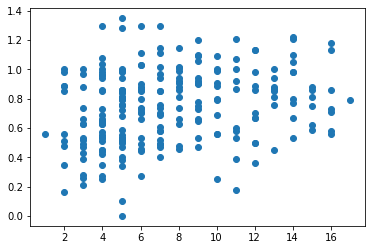

[[14.89093412  0.23577896]
 [ 0.23577896  0.06605088]]
Pearsons correlation: 0.238
p value: 0.0003
Reject the null hypothesis that the means are equal.


Text(0, 0.5, 'Total Spent on Social')

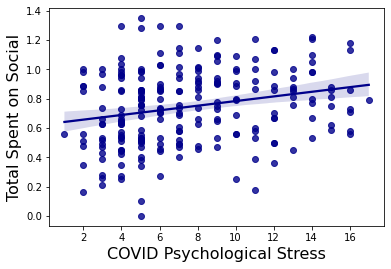

In [70]:
# COVID stress vs total_spent_social

x = wtpdata['COVIDpsychstress_score']
y = wtpdata['total_spent_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDpsychstress_score", y="total_spent_social", data=wtpdata,color="darkblue");
sum_mspss.set_xlabel('COVID Psychological Stress',fontsize=16)
sum_mspss.set_ylabel('Total Spent on Social',fontsize=16)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

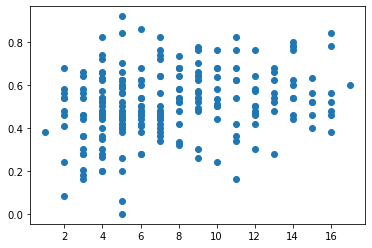

[[14.89093412  0.14944183]
 [ 0.14944183  0.02450715]]
Pearsons correlation: 0.247
p value: 0.0002
Reject the null hypothesis that the means are equal.


Text(0, 0.5, 'Proportion of Chosen Social')

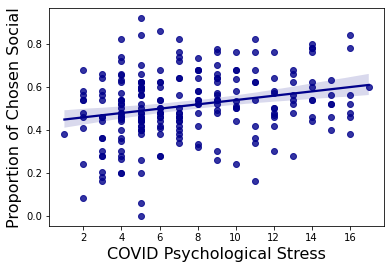

In [74]:
# COVID stress vs prop_social

x = wtpdata['COVIDpsychstress_score']
y = wtpdata['prop_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDpsychstress_score", y="prop_social", data=wtpdata,color="darkblue");
sum_mspss.set_xlabel('COVID Psychological Stress',fontsize=16)
sum_mspss.set_ylabel('Proportion of Chosen Social',fontsize=16)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [62]:
#warnings.filterwarnings("ignore", category=DeprecationWarning)

p = Process(data=wtpdata, model=4, x="COVIDpsychstress_score", y="total_spent_social", m=["MSPSS"])
p.summary()

y = Process(data=wtpdata, model=4, x="COVIDpsychstress_score", y="prop_social", m=["MSPSS"])
y.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = COVIDpsychstress_score
    y = total_spent_social
    m1 = MSPSS

Sample size:
226

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = total_spent_social 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.1520   0.1405 0.0565 19.9819    2  223   0.0000

Coefficients

                        coeff     se      t      p   LLCI   ULCI
Cons                   0.3556 0.0641 5.5428 0.0000 0.2298 0.4813
COVIDpsychstress_score 0.0104 0.0042 2.4463 0.0152 0.0021 0.0187
MSPSS                  0.0601 0.0120 5.0101 0.0000 0.0366 0.0836

-----------------------------------